<a href="https://colab.research.google.com/github/Brian342/FireDetection/blob/main/FireDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing packages
# !pip install -q ultralytics datasets tqdm
!pip install -U ultralytics

In [ ]:
# import packages
import os
from tqdm import tqdm
from PIL import Image
from ultralytics import YOLO
from datasets import load_dataset

In [ ]:
ds = load_dataset("EdBianchi/SmokeFire")

In [ ]:
categories = ['fire', 'normal', 'smoke']
base_dir = "/content/fire_dataset"
splits = {'train': ds['train'], 'test': ds['test'], 'val': ds['validation']}

for split in splits.keys():
    for cat in categories:
        os.makedirs(os.path.join(base_dir, split, cat), exist_ok=True)

print("Extracting and saving the Image .....")
for split_name, data in splits.items():
    for i, item in enumerate(tqdm(data, desc=f"Processing {split_name}")):
        img = item['image']
        label = item['label']
        category = categories[label]

        # ensure image is in RGB (YOLO Requirement)
        if img.mode != 'RGB':
            img  = img.convert('RGB')
        img.save(f"{base_dir}/{split_name}/{category}/img_{i}.jpg")

Extracting and saving the Image .....


Processing val: 100%|██████████| 756/756 [00:07<00:00, 96.12it/s]


In [ ]:
# training with YOLO26
model = YOLO('yolo11n-cls.pt')

results = model.train(
    data = base_dir,
    epochs = 40,
    imgsz = 224,
    device =0,
    project = 'fire_detection',
    name = 'smoke_fire_model'
)

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fire_dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=smoke_fire_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

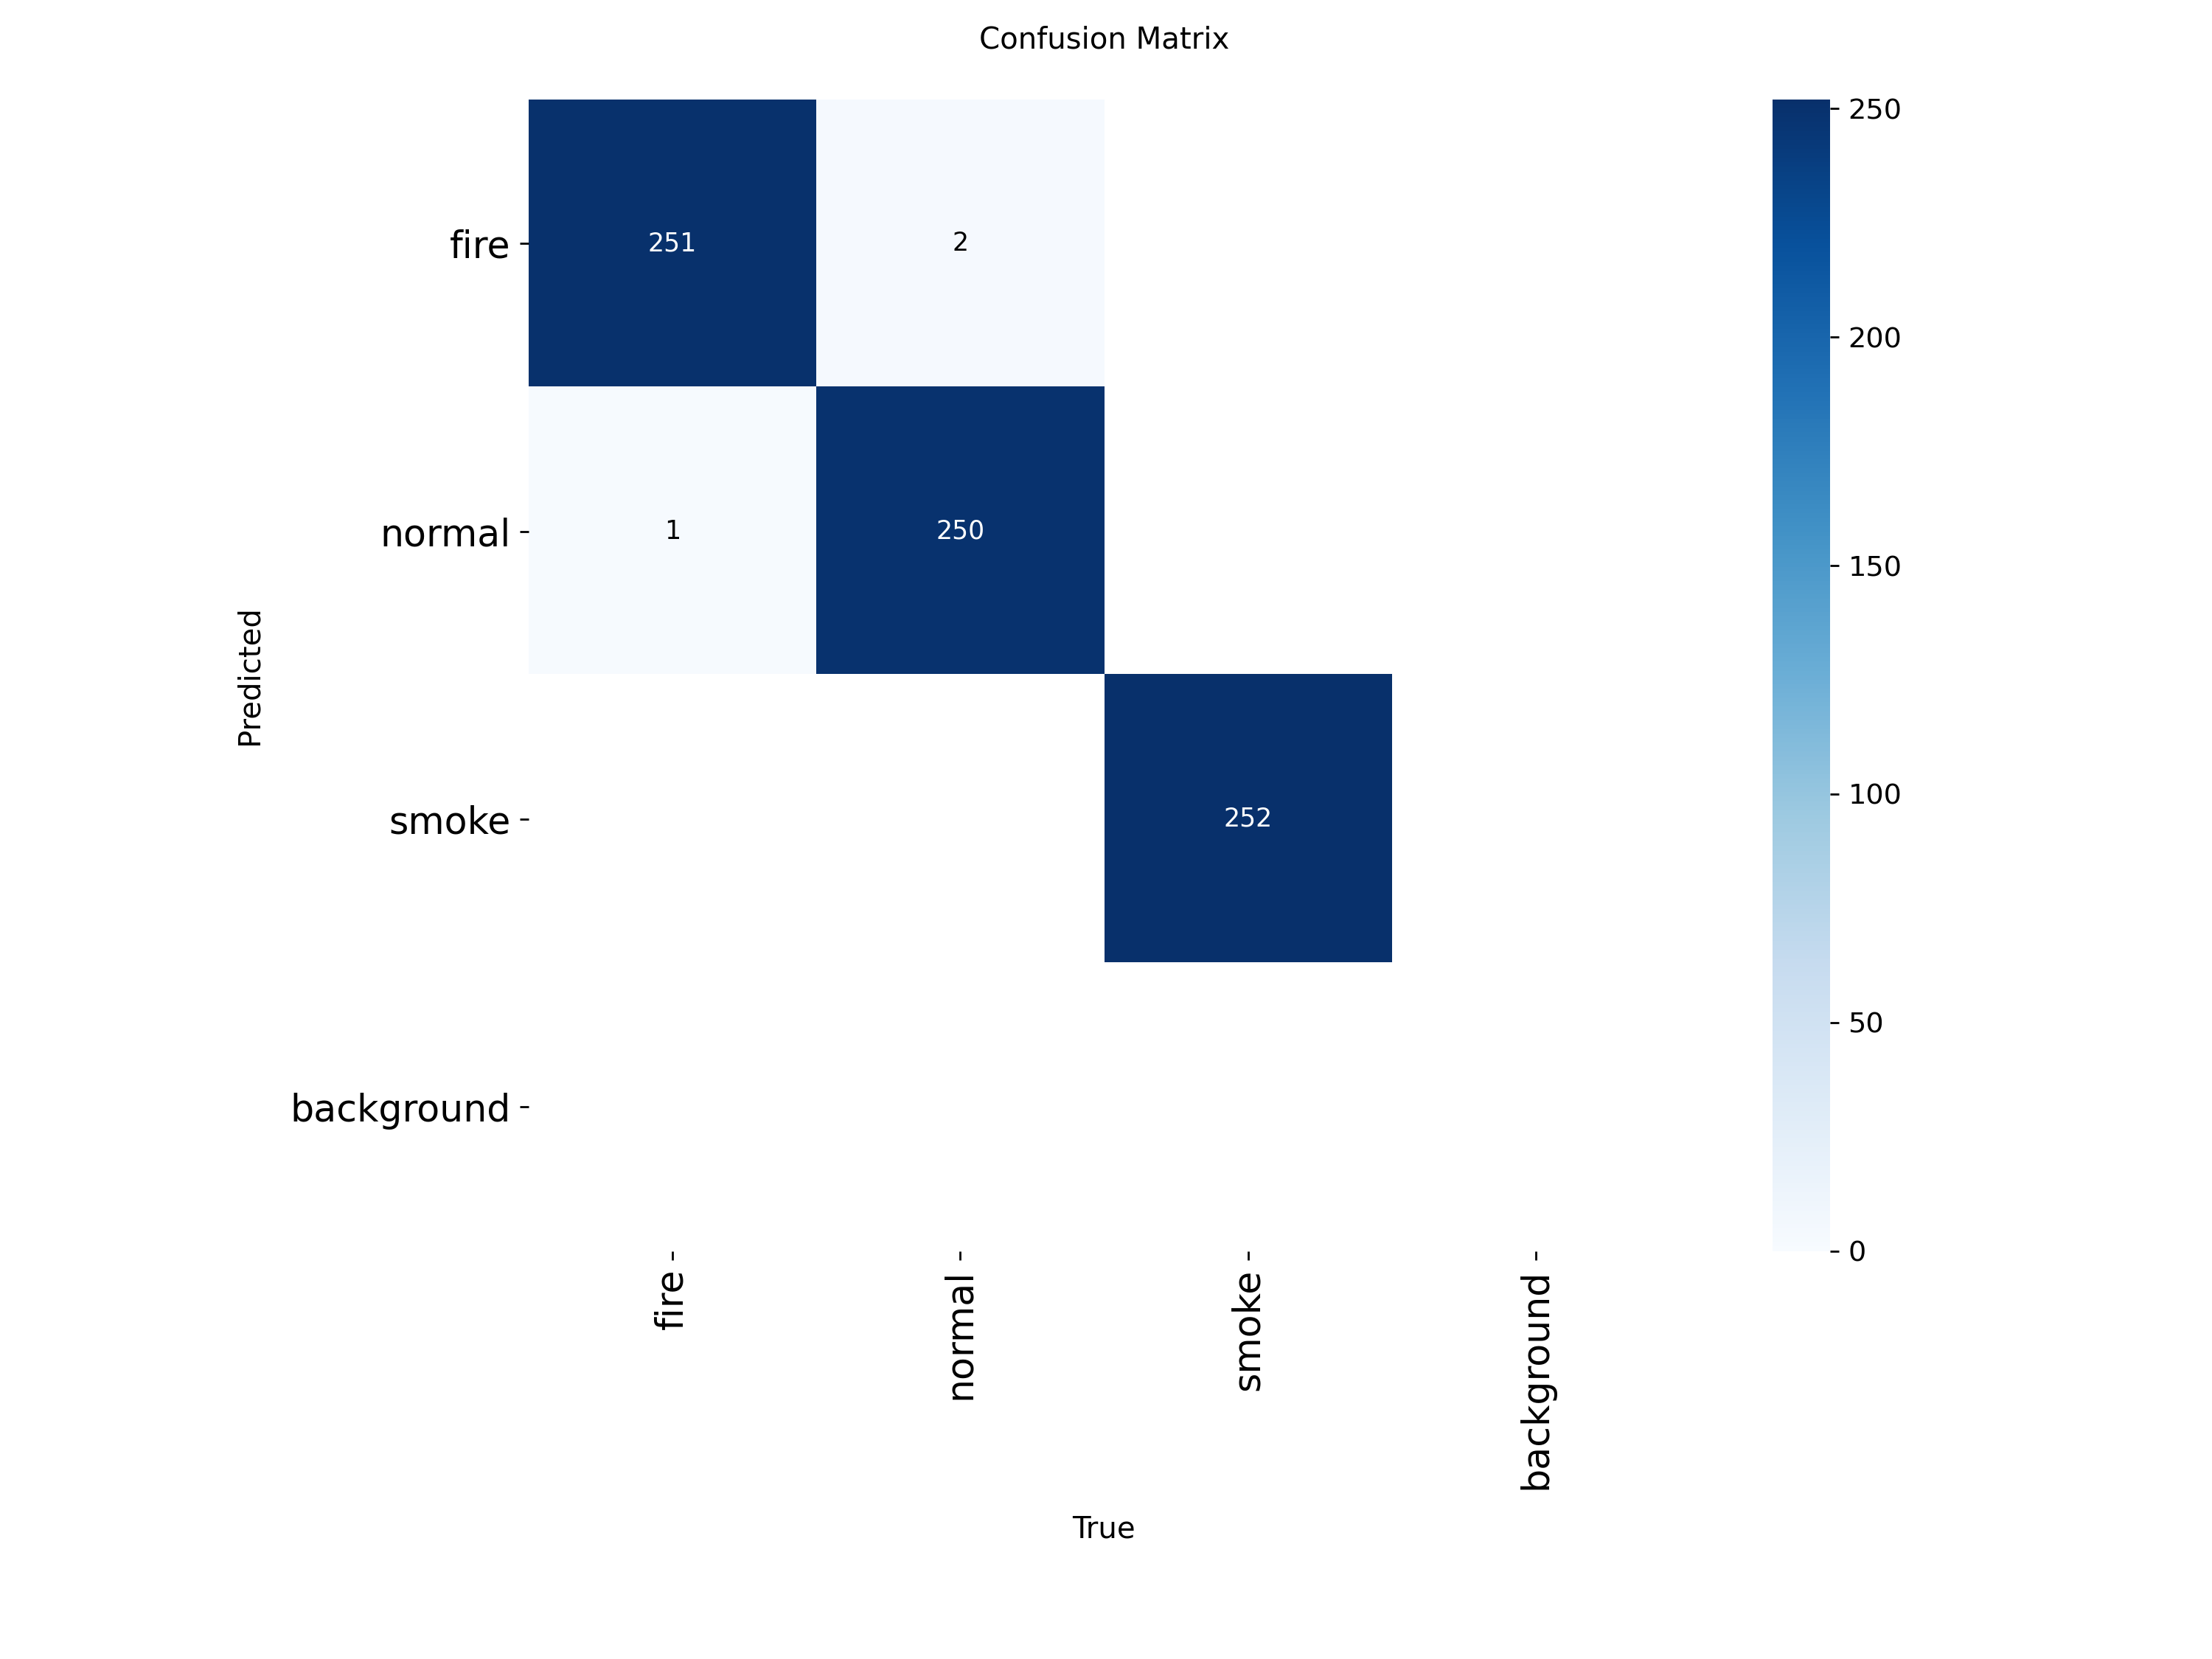

In [ ]:
from IPython.display import Image, display
# view the confusion matrix
display(Image(filename='/content/fire_detection/smoke_fire_model/confusion_matrix.png'))

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# update the training path
drive_path = '/content/drive/MyDrive/Fire_Detection_Project'
os.makedirs(drive_path, exist_ok=True)

model = YOLO('yolo11n-cls.pt')
results = model.train(
    data = base_dir,
    epochs = 40,
    imgsz = 224,
    device = 0,
    project = drive_path,
    name = 'v1_yolo11_fire'
)

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fire_dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=v1_yolo11_fire, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos